In [1]:
# ライブラリの読み込み
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline

# データセットの読み込み
digits = datasets.load_digits()
print(dir(digits))
"""
DESCR データセットの説明文
data 画像データ（特徴量: 訓練データとテストデータに使用します。）
images 8×8の行列
target 画像データに対応する数字（ターゲット『ラベル』: 教師データと検証用データに使用します。）
target_names ターゲットの名前（書いた数字の種類）
"""

['DESCR', 'data', 'images', 'target', 'target_names']


'\nDESCR データセットの説明文\ndata 画像データ（特徴量: 訓練データとテストデータに使用します。）\nimages 8×8の行列\ntarget 画像データに対応する数字（ターゲット『ラベル』: 教師データと検証用データに使用します。）\ntarget_names ターゲットの名前（書いた数字の種類）\n'

In [2]:
# digitデータセットのdataの値を出力
print(digits.data)
# digitデータセットのdataの構造を出力 1967×64の2次元配列 (1797, 64)
print(digits.data.shape)
# digitデータセットのtargetの構造を出力　要素が1797個の1次元配列
print(digits.target.shape)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
(1797, 64)
(1797,)


64
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
(64,)


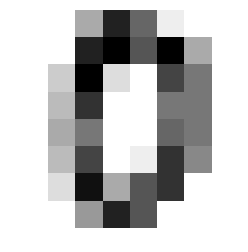

In [3]:
# 中身の確認
print(len(digits.data[0]))
print(digits.data[0])
print(digits.data[0].shape)

import numpy as np
img = np.reshape(digits.data[0], (8, 8))
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')
plt.show()

In [4]:
# データ数を取得
num = len(digits.data)
print('num=' + str(num)) # 1797枚の画像がある

num=1797


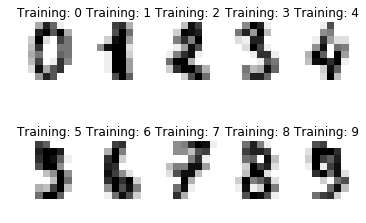

In [5]:
# データセットの画像の確認
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

In [6]:
training_num = num*2//3
print('training_num=' + str(training_num))
print('training_num_type=' + str(type(training_num)))

training_num = int(num*2//3)
print('training_num=' + str(training_num))
print('training_num_type=' + str(type(training_num)))

training_num=1198
training_num_type=<class 'int'>
training_num=1198
training_num_type=<class 'int'>


In [7]:
data = digits.images.reshape((num, -1))
# 最初の文字のベクトル
print(data[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


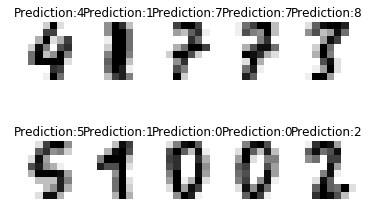

['./model.pkl']

In [8]:
# SVMによるモデル作成
classifier = svm.SVC(gamma=0.001)

X_train = data[:training_num]
y_train = digits.target[:training_num]

classifier.fit(X_train, y_train)

excepted = digits.target[training_num:]
predicted = classifier.predict(data[training_num:])
images_and_predictions = list(zip(digits.images[training_num:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(2, 5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction:%i' % prediction)
plt.show()

joblib.dump(classifier, './model.pkl')